<a href="https://colab.research.google.com/github/twiddling-thumbs/Sentiment-Analysis-and-Web-Scrapping/blob/main/AmazonScraping_using_beautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#used to make requests for the web pages
import requests
#used to pull out data from html and xml files
from bs4 import BeautifulSoup

In [ ]:

#that search query of what we have to fatch from the site
#every platform has the different way of fatching the data.
search_query="nike+shoes+men"

In [ ]:
#Domain link
base_url="https://www.amazon.com/s?k="

In [ ]:
#Inorder to fatch a perticular items,
#we have to combine the domain link with the search query
#so it will navigate to the desired part of the site
url=base_url+search_query
url

'https://www.amazon.com/s?k=nike+shoes+men'

Once the link is generated, second important thing is to have user agent and referer ifnormation of the amazon. These are the two inofrmations in whch user agaent tells our program wa domain to hit and refrer authenticates us that we are legally extracting the data from the amazon. Without these the connection willnot be established and Amazon will deny your request to scrap data.

Note: User Agent and refrer can be found in Inspect elemnt -> network tab -> select first ping

In [ ]:
#this will help us to get connection response from Amazon
#user agernt is you, your ip address
# referrrer is the area you,re searching from like karachi means pakistan ke server se karachi
#stream line cant be made without it
header={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36',
        'referer':'https://www.amazon.com/s?k=nike+shoes+men&crid=28WRS5SFLWWZ6&sprefix=nike%2Caps%2C357&ref=nb_sb_ss_organic-diversity_2_4'}

In [ ]:
#Sends a GET request.
search_response=requests.get(url,headers=header)
print(search_response)

<Response [200]>


In [ ]:
# It's a HTTP status code, it means OK
# The server successfully answered the http request.
#connection is established
search_response.status_code

200

In [1]:
#gives the text response
# search_response.text

Cookies are files created by websites you visit. They make your online experience easier by saving browsing information. With cookies, sites can keep you signed in, remember your site preferences, and give you locally relevant content.

In [ ]:
#extract cookies
search_response.cookies

<RequestsCookieJar[Cookie(version=0, name='i18n-prefs', value='USD', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1698801669, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id', value='134-6282250-6851518', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1698801669, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id-time', value='2082787201l', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1698801669, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

<h2>SCRAPING AMAZON</h2>

In [ ]:
cookie={} # insert request cookies within{}
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
# ## function to get the contents of individual product pages using 'data-asin' number (unique identification number)
#asin is the variable against which amazon store codes for each product ID
def Searchasin(asin):
    url="https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
# ## function to pass on the link of 'see all reviews' and extract the content
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

>>Extraction

In [ ]:
# ## First page product reviews extraction
product_names=[]
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
# # findall() finds *all* the matches and returns them as a list of strings,
# with each string representing one match.
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}):
    # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list

https://www.amazon.com/s?k=nike+shoes+men


In [ ]:
product_names

["Men's Revolution 5 Wide Running Shoe",
 "Men's Court Vision Low Sneaker",
 "Men's Free Run 2 Running Shoes Sneaker 537732 004",
 "Men's Gymnastics Shoes",
 "Men's Court Vision Mid Sneaker",
 "Men's Kyrie Flytrap IV Basketball Shoe",
 "Men's RunAllDay Running Shoes",
 'Mens Parker Wool Sneakers | Wool Shoes | Runners Running Shoes | Walking Shoe for Men | Slip On',
 'Magellan Mens Breathable Trainers Waterproof Hiking Walking Shoes',
 "Weightlifting Shoes Ideal for Crossfit & Gym - Men's Sneakers - VENJA",
 "Men's Charged Assert 9 Running Shoe",
 'Unisex-Adult Dame 8 Basketball Shoe',
 "Men's Sneakers",
 "Men's Bb4500 Hi 2 Sneaker",
 'Mens Air Running Shoes Athletic Tennis Sneakers US 7.5-US 13…',
 "Men's Flex Control Tr4 Cross Trainer",
 "Men's Tanjun Sneakers, Breathable Textile Uppers and Comfortable Lightweight Cushioning",
 "Men's Court Vision Mid Sneaker",
 'Mens Free Rn 2018 Running Shoe',
 "Men's Running Shoe",
 "Men's Air Force 1 '07 An20 Basketball Shoe",
 "Men's Free Rn Fly

In [ ]:
#returns the fetched products in span class
len(product_names)

72

In [ ]:
data_asin=[]
response=getAmazonSearch('nike+men+shoe')
soup=BeautifulSoup(response.content)
for i in soup.findAll("div",{'class':"sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"}):
    data_asin.append(i['data-asin'])

NameError: ignored

In [ ]:
response.status_code

200

In [ ]:
len(data_asin)

48

In [ ]:
#same page different ids here
data_asin

['B07RLYXS26',
 'B09DCF64DF',
 'B004IM7I7Y',
 'B07NLVRC63',
 'B07NMZ6S6Z',
 'B07ZJNYC3Y',
 'B08TQV3C1S',
 'B096VSZ71N',
 'B01K6O5AUE',
 'B08XYN1CVW',
 'B09YNTQ9M9',
 'B09RR268RB',
 'B071K7818X',
 'B078Y7NCJ8',
 'B005AHBLSS',
 'B08Q8RVWDW',
 'B08GJ3FWXW',
 'B07P8BBYBQ',
 'B0B2TNXJ82',
 'B095NM29ZD',
 'B098969F28',
 'B08ZJ6T8TX',
 'B07DCJ519Q',
 'B01L91BO0I',
 'B09NMJZQQT',
 'B07ZTVLH3S',
 'B07YKMGJ56',
 'B09CT59YZT',
 'B09PZ75XG6',
 'B08SC7DNNG',
 'B08NYK1TBC',
 'B00LCJE9E6',
 'B078X16RP7',
 'B09NMFXGR4',
 'B07SKKSVQM',
 'B07RGLZXKH',
 'B08Q9PT2K2',
 'B08TV69LRV',
 'B08HK18FKZ',
 'B093C62XRN',
 'B09DBGB76J',
 'B08Q8RLYYC',
 'B07GHHH2JG',
 'B09Z79CX1C',
 'B0B12QL54T',
 'B005ANMORO',
 'B09RPC5ZM8',
 'B07ZJPP9J1']

In [ ]:
# #### By passing the data-asin numbers, we can extract the 'see all reviews' link for each product in the page
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B07RLYXS26
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B09DCF64DF
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B004IM7I7Y
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B07NLVRC63
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B07NMZ6S6Z
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B07ZJNYC3Y
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B08TQV3C1S
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B096VSZ71N
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B01K6O5AUE
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B08XYN1CVW
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B09YNTQ9M9
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B09RR268RB
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B071K7818X
https://www.amazon.com/Nike-Torch-Running-Shoes-Black/dp/B078Y7NCJ8
https://www.amazon.com/Nike-Torch-Running-Shoes-

In [ ]:
len(link)

90

In [ ]:
link

['/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Monarch-Cross-Trainer/product-reviews/B07JQKM2SP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Monarch-Cross-Trainer/product-reviews/B07JQKM2SP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Court-Vision-Sneaker/product-reviews/B0BJ498R66/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Nike-Mens-Court-Vision-Sneaker/product-reviews/B0BJ498R66/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [ ]:
reviews=[]
for j in range(len(link)):
    for k in range(100):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)

https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-reviews/B07RDMBS9J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Nike-Mens-Control-Cross-Trainer/product-r

Extracting reviews using review links

In [ ]:
len(reviews)

21383

In [ ]:
rev={'reviews':reviews}
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [ ]:
review_data.head(5)

,reviews
0,\nI’ve been using this for about a month now for light workouts and regular wear and it’s been holding up good. I settled on this after a couple of others and this has been the best of the lot. This shoe is what I was looking for!\n
1,\nThese shoes fit good but you have to pay attention to the sizing chart whether they are regular or wide. Overall good durable shoe with great comfort for every day where\n
2,\nNot enough cushion\n
3,"\nGot it for indoor and tennis reasons, and so far, it's a great experience. I will update the review if I see any problems when I regularly use it.Tried for airport walks as well and happy with the performance.\n"
4,"\nFeels tight , uncomfortable\n"


In [ ]:
review_data.shape

(21383, 1)

In [ ]:
review_data.to_csv('amazon_reviews.csv')

In [ ]:
review_data.to_excel('amazon_reviews.xlsx', index=False)

In [ ]:
review_data

,reviews
0,\nI’ve been using this for about a month now for light workouts and regular wear and it’s been holding up good. I settled on this after a couple of others and this has been the best of the lot. This shoe is what I was looking for!\n
1,\nThese shoes fit good but you have to pay attention to the sizing chart whether they are regular or wide. Overall good durable shoe with great comfort for every day where\n
2,\nNot enough cushion\n
3,"\nGot it for indoor and tennis reasons, and so far, it's a great experience. I will update the review if I see any problems when I regularly use it.Tried for airport walks as well and happy with the performance.\n"
4,"\nFeels tight , uncomfortable\n"
...,...
21378,\nThere is some kind of bump in the right shoe. Returning as even putting it on for a moment was not comfortable. Never had this issue with Nike.\n
21379,\nMe agrado mucho y son muy cómodas para hacer ejercicio\n
21380,"\nDer Sneaker sieht gut aus, allerdings ist er zu schmal. Ich würde jetzt nicht behaupten, dass die Füße breit sind, aber der Schuh war einfach zu eng. Daher gibt er leider zurück.\n"
21381,"\nLe Nike varsity non le uso in modo consono, in quanto le utilizzo per uscire con gli amici e per fare brevi passeggiate. Per questo uso devo dire che sono molto comode e hanno un bel design\n"


<h1>Sentiment Analysis of Reviews</h1>


In [ ]:
import nltk
#RegexpTokenizer - splits a string into substrings using a regular expression
from nltk.tokenize import RegexpTokenizer
# #mapping a group of words to the same stem
# even if the stem itself is not a valid word in the Language
#WordNetLemmatizer is better than PorterStemmer cause it sometimes doesnt give the dectonary base word
#e.g: base word for running is run.
from nltk.stem import WordNetLemmatizer, PorterStemmer
# corpus - a collection of text documentation
from nltk.corpus import stopwords
#to filter out the uel, links and etc so we create our own rules.
import re

In [ ]:
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#intensity of the word, or the frequency of a perticular word - bigger the word more the frequency
from wordcloud import WordCloud
# # for processing textual data. used in sentiment analysis, classification, translation
# It provides a simple API for diving into common natural language processing
#polarity +ve -ve
#subjectivity - how close the perticuler subject
from textblob import TextBlob
#import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_reviewsHeadphonesEx.csv to amazon_reviewsHeadphonesEx.csv


In [ ]:
#reading the file having text data
data=pd.read_csv("amazon_reviewsHeadphonesEx.csv")

NameError: ignored

In [ ]:
data.head(3)

,Unnamed: 0,reviews
0,0,\nI’ve been using this for about a month now for light workouts and regular wear and it’s been holding up good. I settled on this after a couple of others and this has been the best of the lot. This shoe is what I was looking for!\n
1,1,\nThese shoes fit good but you have to pay attention to the sizing chart whether they are regular or wide. Overall good durable shoe with great comfort for every day where\n
2,2,\nNot enough cushion\n


In [ ]:
data=data.drop(["Unnamed: 0"],axis=1)
data.head()

,reviews
0,\nI’ve been using this for about a month now for light workouts and regular wear and it’s been holding up good. I settled on this after a couple of others and this has been the best of the lot. This shoe is what I was looking for!\n
1,\nThese shoes fit good but you have to pay attention to the sizing chart whether they are regular or wide. Overall good durable shoe with great comfort for every day where\n
2,\nNot enough cushion\n
3,"\nGot it for indoor and tennis reasons, and so far, it's a great experience. I will update the review if I see any problems when I regularly use it.Tried for airport walks as well and happy with the performance.\n"
4,"\nFeels tight , uncomfortable\n"


DATA PROCESSING

Steps to preprocess the data
<ol>
 <li>Convert to lower case</li>
 <li>Remove punctuation</li>
 <li>Apply re to remove unwanted data</li>
 <li>Remove stop words</li>
 <li>lemmetize</li>
</ol>

In [ ]:
#function to process/clean the data
def preprocess(sentence):
  sentence=str(sentence)
  sentence=sentence.lower()
  sentence=sentence.replace('{html}',"")
  cleanr=re.compile('<.*?>')
  cleantext=re.sub(cleanr,'',sentence)
  rem_url=re.sub(r'http\S+','',cleantext)
  rem_num=re.sub('[0-9]+','',rem_url)
  tokenizer=RegexpTokenizer(r'\w+')
  tokens=tokenizer.tokenize(rem_num)
  filtered_words=[w for w in tokens if len(w)>2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#to store data into column after cleaning
data['cleanReviews']=data['reviews'].map(lambda s: preprocess(s))
data.to_csv(r'cleand_amazon.csv',index=False)#store file having cheaned data

In [ ]:
data.to_csv(r'cleand_amazon.csv',index=False)#store file having cheaned data

In [ ]:
#function for subjectivity and polarity calculation
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
data['subjectivity']=data['cleanReviews'].apply(getSubjectivity)

In [ ]:
data['Polarity']=data['cleanReviews'].apply(getPolarity)

In [ ]:
#polarity score
def GetAnalysis(score):
  if score<0:
    return 'Negitive'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
#annotating data
data['Sen_tag']=data['Polarity'].apply(GetAnalysis)
data.head()

,reviews,cleanReviews,subjectivity,Polarity,Sen_tag
0,\nI’ve been using this for about a month now for light workouts and regular wear and it’s been holding up good. I settled on this after a couple of others and this has been the best of the lot. This shoe is what I was looking for!\n,using month light workouts regular wear holding good settled couple others best lot shoe looking,0.419231,0.525000,Positive
1,\nThese shoes fit good but you have to pay attention to the sizing chart whether they are regular or wide. Overall good durable shoe with great comfort for every day where\n,shoes fit good pay attention sizing chart whether regular wide overall good durable shoe great comfort every day,0.403846,0.357143,Positive
2,\nNot enough cushion\n,enough cushion,0.500000,0.000000,Neutral
3,"\nGot it for indoor and tennis reasons, and so far, it's a great experience. I will update the review if I see any problems when I regularly use it.Tried for airport walks as well and happy with the performance.\n",got indoor tennis reasons far great experience update review see problems regularly use tried airport walks well happy performance,0.706731,0.425000,Positive
4,"\nFeels tight , uncomfortable\n",feels tight uncomfortable,0.642857,-0.339286,Negitive


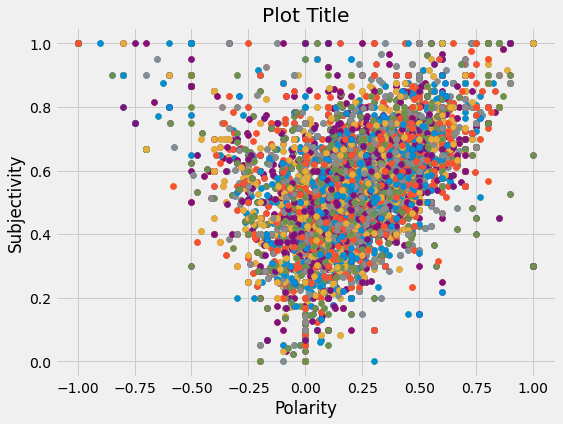

In [ ]:
#graph ploting b/w polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['subjectivity'][i])
plt.title('Plot Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()